In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [12]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
df= pd.read_csv("diabetes.csv")


In [13]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Um dataset já pronto pra criarmos um modelo de machine learning

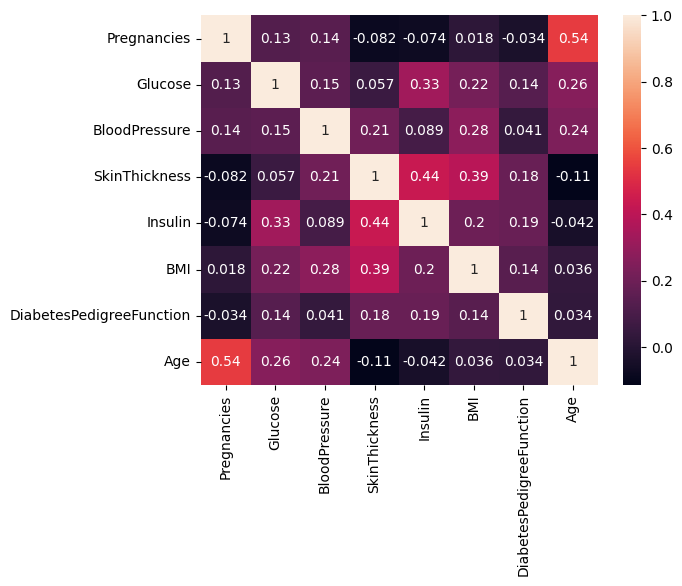

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
#Gosto muito desse gráfico de correlaçao
sns.heatmap(df[features].corr(), annot=True)
plt.show()


In [16]:
#Separamenos nosso dataset para treino e teste
X = df[features]
y = df.Outcome
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [18]:
clf = DecisionTreeClassifier()

clf = clf.fit(X_train,y_train)

y_predction = clf.predict(X_test)

In [20]:
#Vendo a acurancia do modelo
print("Acurancia:",metrics.accuracy_score(y_test, y_predction))

Acurancia: 0.7012987012987013


In [21]:
#Uma acurancia de 70% porcento, o que não é ruim mas é possivel melhorar

In [27]:
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

dot_data = export_graphviz(clf, out_file=None,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X_test.columns,
                class_names=['0','1'])


In [28]:
graph1=graphviz.Source(dot_data);
graph = pydotplus.graph_from_dot_data(dot_data)

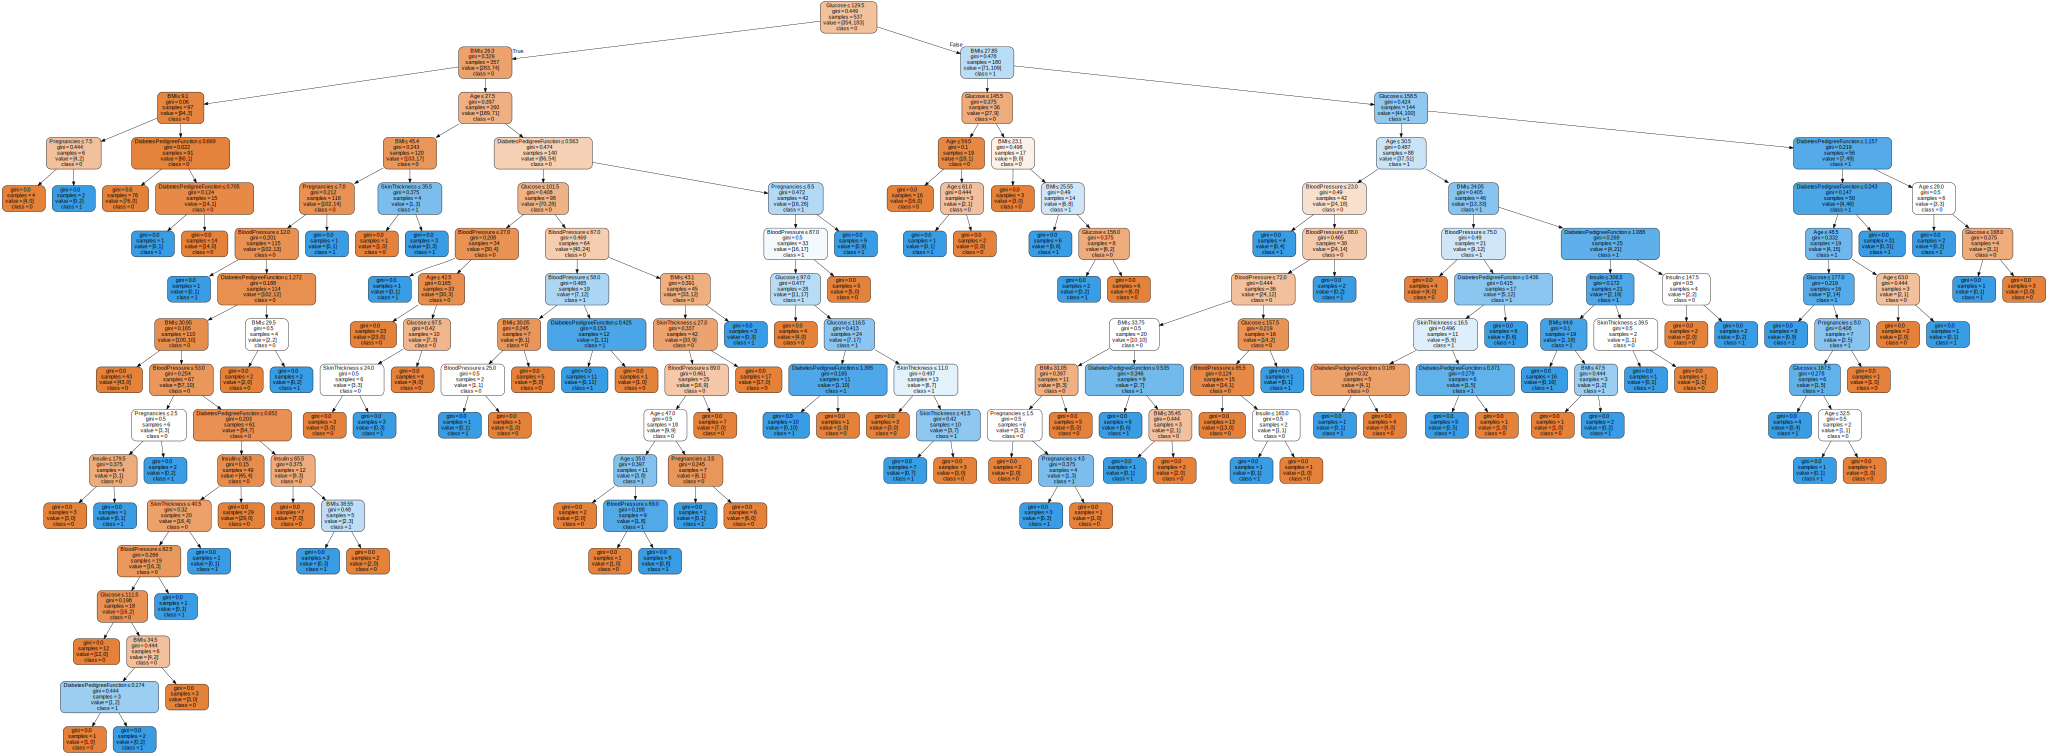

In [31]:
graph1
#Ficou extremamente complexo nosso modelo, podemos melhorar a acurancia tornando o modelo mais simples

In [32]:
#Criando um modelo mais simples
clf1 = DecisionTreeClassifier(criterion="entropy", max_depth=3)

#Treinando
clf1 = clf1.fit(X_train,y_train)
y_pred = clf1.predict(X_test)


print("Acurancia:",metrics.accuracy_score(y_test, y_pred))

Acurancia: 0.7705627705627706


In [33]:
#Melhoramos a acurancia mesmo que pouco

In [34]:
dot_data1 = export_graphviz(clf, out_file=None,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X_test.columns,
                class_names=['0','1'])
graph2=graphviz.Source(dot_data);


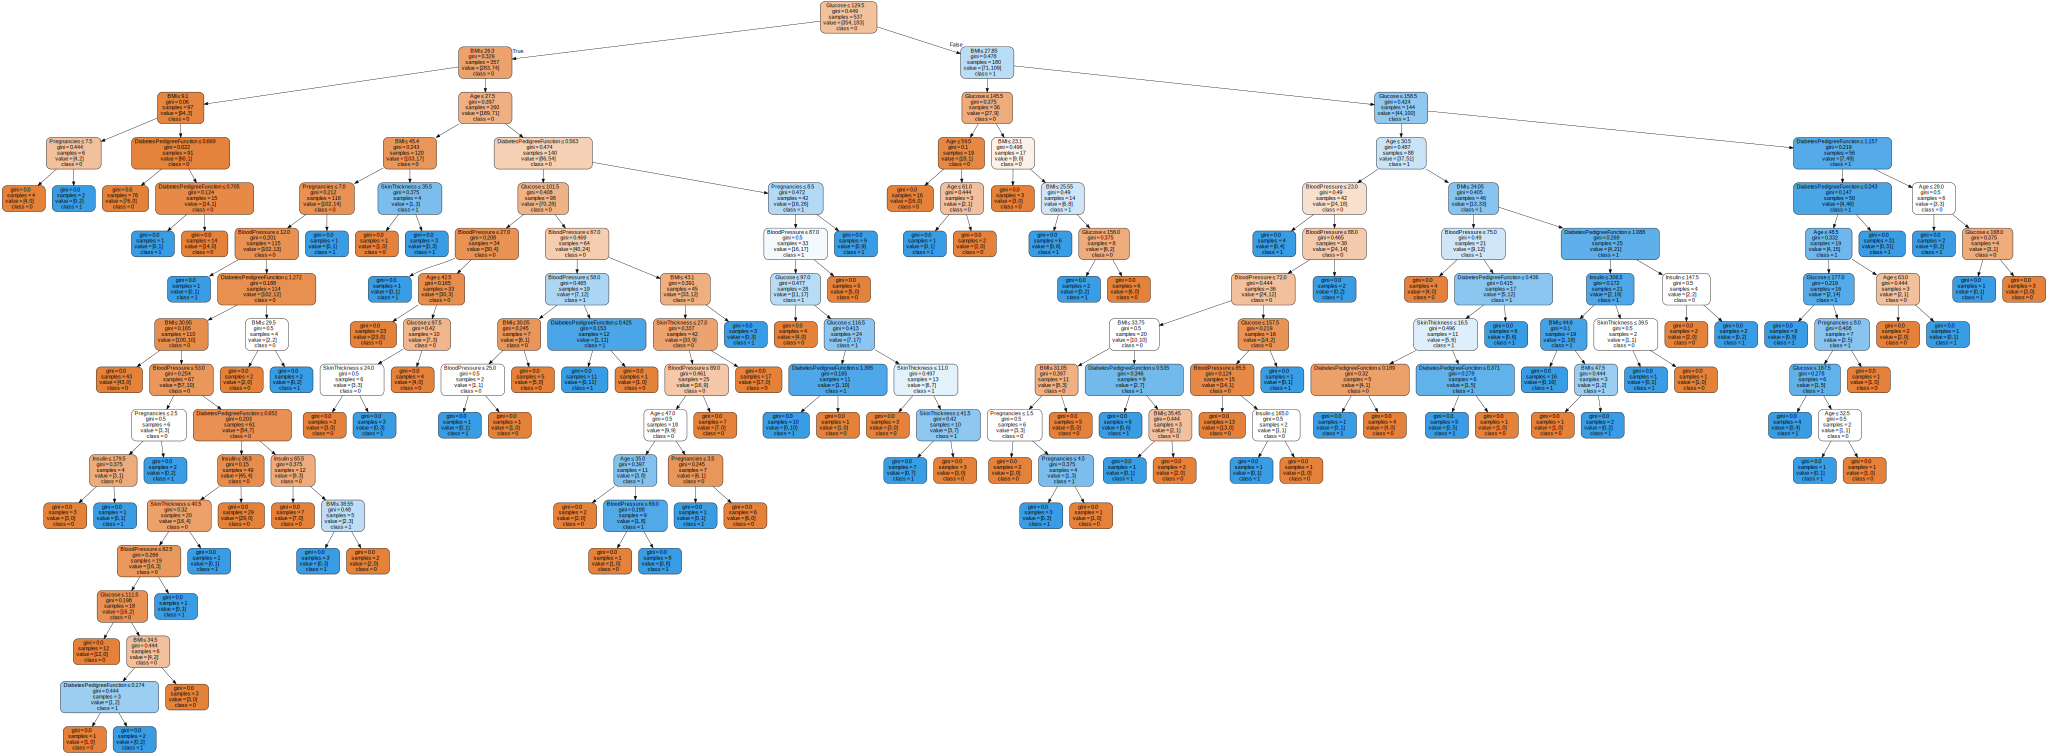

In [35]:
graph2
#Temos uma arvore de decisão mais simples